# Part 0. Dataset Preparation
Download the Cifar10 dataset and devise an appropriate training set split. 

In this section:
<ul>
<li>Download the dataset as described above</li>
<li>Divide the raw data into appropriate training and test sets for both the images and corresponding labels for use with the subsequent parts of the assignment.</li>
<li>Visualize five samples of each class by plotting a grid using the matplotlib library.</li>
</ul>


important libraries , install dataset

In [ ]:
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC 
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LogisticRegression 
from tensorflow.keras.datasets import cifar10
from sklearn.svm import SVC
from scipy import stats
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Divide the raw data into appropriate training and test sets for both the images and corresponding labels

In [ ]:
(x2_train, y2_train) , (x2_test,y2_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


Take a sampel from data  
```
30000 for training 
10000 for testing
```



In [ ]:
num_training = 30000
mask = list(range(num_training))
x2_train = x2_train[mask]
y2_train = y2_train[mask]

num_test = 10000
mask = list(range(num_test))
x2_test = x2_test[mask]
y2_test = y2_test[mask]

In [ ]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x2_train.shape, y2_train.shape))
print('Test: X=%s, y=%s' % (x2_test.shape, y2_test.shape))


Train: X=(30000, 32, 32, 3), y=(30000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


Visualize five samples of each class by plotting a grid using the matplotlib library

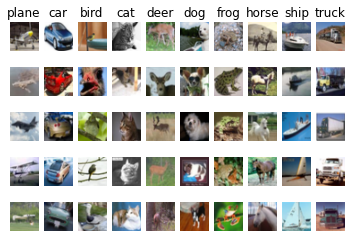

In [ ]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 5
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y2_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x2_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

info about shape of the images and reshape it before using different models

In [ ]:
x2_train = np.reshape(x2_train, (x2_train.shape[0], -1))/255
x2_test = np.reshape(x2_test, (x2_test.shape[0], -1))/255
print(x2_train.shape, x2_test.shape)

(30000, 3072) (10000, 3072)


In [ ]:
x2_test.shape

(10000, 3072)

# Part 1. k-NN Classifier
For this section, implement a simple kNN Classifier on the Cifar10 dataset. To do this you will need to perform the following steps:
- Create a k-NN class. Your class must contain a method that returns predictions for your test set.
- Provide a suitable distance metric that you will use to calculate the nearest neightbours. You may choose the distance metric you believe is most suitable.
- Calculate the k nearest neighbours and make predictions.
- Choose the a value for _k_ that results in the highest accuracy on your test set. Show how you found this value.

When your classifier is working:
- Use sklearn to calculate accuracy and plot a confusion matrix using your predictions.
- Provide a brief discussion of your results




##using KNN algorithm from sklearn only for compare

In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)


In [ ]:
#Train the model using the training sets
knn.fit(x2_train, y2_train)

#Predict the response for test dataset
y2_pred = knn.predict(x2_test)

C:\Users\mm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
acc_knn = accuracy_score(y2_test,y2_pred)
acc_knn

0.3268

##using KNN algorithm from scratch 

Create a k-NN class

In [ ]:
class kNN():
    # Initialise
    def __init__(self, k=3, metric='euclidean', p=None):
        self.k = k
        self.metric = metric
        self.p = p
    
    # Euclidean distance 
    def euclidean(self, v_1, v_2):
        return np.sqrt(np.sum((v_1-v_2)**2))
    
    # Manhattan distance 
    def manhattan(self, v_1, v_2):
        return np.sum(np.abs(v_1-v_2))
    
    # Minkowski distance 
    def minkowski(self, v_1, v_2, p=2):
        return np.sum(np.abs(v_1-v_2)**2)**(1/2)
        
    # Store train set
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
    
        # Make predictions
    def predict(self, x_test):
        preds = []
        for test_row in x_test:
            nearest_neighbours = self.get_neighbours(test_row)
            majority = stats.mode(nearest_neighbours)[0][0]
            preds.append(majority)
        return np.array(preds)
    
    # Get nearest neighbours
    def get_neighbours(self, test_row):
        distance = list()
        
        # Calculate distance to all points in x_train
        for (train_row, train_class) in zip(self.x_train, self.y_train):
            if self.metric=='euclidean':
                dist = self.euclidean(train_row, test_row)
            elif self.metric=='manhattan':
                dist = self.manhattan(train_row, test_row)
            elif self.metric=='minkowski':
                dist = self.minkowski(train_row, test_row, self.p)
            else:
                raise NameError('Supported metrics are euclidean, manhattan and minkowski')
            distance.append((dist, train_class))
            
        # Sort distance
        distance.sort(key=lambda x: x[0])
        
        # Identify k nearest neighbours
        n_neighbours = list()
        for i in range(self.k):
            n_neighbours.append(distance[i][1])
            
        return n_neighbours


Comparing between distances methods to select the best one

In [ ]:
for metrics in ['euclidean', 'manhattan','minkowski']:
    knn_scratch = kNN(k=5, metric=metrics)
    knn_scratch.fit(x2_train, y2_train)
    preds = knn_scratch.predict(x2_test)

    print(f'Metric: {metrics}, accuracy: {accuracy_score(preds, y2_test):.2f} %')

Metric: euclidean, accuracy: 0.20 %
Metric: manhattan, accuracy: 0.23 %
Metric: minkowski, accuracy: 0.20 %


select the best number of k

In [ ]:
acc_k = []
k_values = []
for i in [9,15,27,33,39,43,49,55,59,63,79,89]:
  for metric in ['manhattan']:
    knn_scratch_k = kNN(k=i, metric=metric)
    knn_scratch_k.fit(x2_train, y2_train)
    pred_k = knn_scratch_k.predict(x2_test)
    acc_k.append(accuracy_score(pred_k, y2_test))
    print(f'n_neighbors ={i}, accuracy: {accuracy_score(pred_k, y2_test):.2f} %')

n_neighbors =9, accuracy: 0.23 %
n_neighbors =15, accuracy: 0.24 %
n_neighbors =27, accuracy: 0.23 %
n_neighbors =33, accuracy: 0.23 %
n_neighbors =39, accuracy: 0.22 %
n_neighbors =43, accuracy: 0.22 %
n_neighbors =49, accuracy: 0.22 %
n_neighbors =55, accuracy: 0.22 %
n_neighbors =59, accuracy: 0.22 %
n_neighbors =63, accuracy: 0.22 %
n_neighbors =79, accuracy: 0.22 %
n_neighbors =89, accuracy: 0.22 %


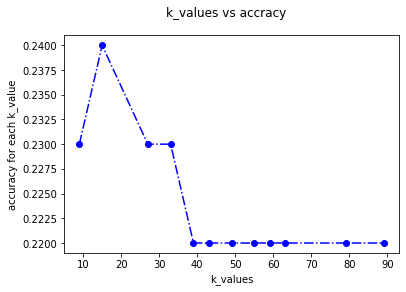

In [ ]:
k_values = [9,15,27,33,39,43,49,55,59,63,79,89]
fig, ax = plt.subplots()
ax.plot(k_values, acc_k, 'o:b',linestyle="-.")
ax.set_xlabel('k_values')
ax.set_ylabel('accuracy for each k_value') 
fig.suptitle("k_values vs accracy") 
plt.show()

Applying best distance method with best k value

In [ ]:
for metric in ['manhattan']:
    knn_scratch = kNN(k=15, metric=metric)
    knn_scratch.fit(x2_train, y2_train)
    pred_manh = knn_scratch.predict(x2_test)

    print(f'Metric: {metric}, accuracy: {accuracy_score(pred_manh, y2_test):.2f} %')

Metric: manhattan, accuracy: 0.24 %


Apply confusion mateix with best parmeters

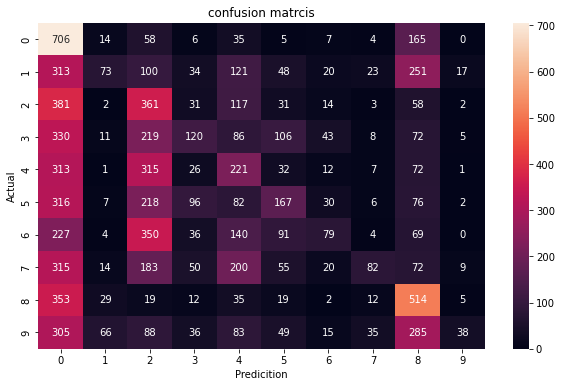

In [ ]:
cm = confusion_matrix(y2_test,pred_manh)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrcis")
plt.show()

Brief discussion

For building the k-Nearest Neighbors class from scratch, we have to apply three main steps:

1.   calculate the most sutiable distance ('Euclidean',  'Manhattan', 'Minkowski')
2.   Get the nearest neighbors
3.   Make a prediction

After applying the k_nearest neighbors class, first, compare different distance models and calculate the accuracy, the best distance method was (Manhattan) then take multiple random values to get the best number of neighbors using the best distance method and it equals 15 `

After choosing the best number of K_value and distance that achieve the best accuracy  build the model and plot the confusion matrix 

Implementing knn from sklearn and knn from scratch, calculating the accuracy for both knn sklearn = 32% and for knn from scratch = 24%  

# Part 2. Logistic Regression

For this section you will perform binary classification using logistic regression. Just as in Part 1. you will use the Cifar10 dataset, however to obtain a result for each class using logistic regression you will need to use a One-vs-Rest (OvR) approach to acheive multi-class classification.

Using ```LogisticRegression()``` in sklearn, write a function to execute the OvR strategy for the Cifar10 classes. Do not use the built-in ```OneVsResClassifier()``` method. You will need to follow these basic steps:
- Train a binary classifier for each class, where the target class is a "positive" results and the combination of the remaining classes are "negative". For Cifar10 you will need 10 models.
- For each test sample compute the probabilities for each model
- Select the argmax of the probabilities to obtain the predicted class

Collect your predictions from the test set and compute the accuracy score and plot a confusion matrix.

using Logistic Regression from sklearn besline model


In [ ]:
model = LogisticRegression()
rfe = model.fit(x2_train,y2_train)
presd_log = rfe.predict(x2_test)
pred_pr = rfe.predict_proba(x2_test)
acc_log = accuracy_score(y2_test, presd_log)
acc_log

C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.3991

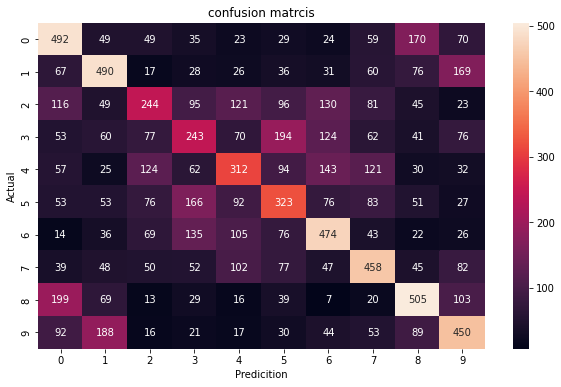

In [ ]:
cm = confusion_matrix(y2_test,presd_log)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrcis")
plt.show()

OvR strategy

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy for model 0  equal 0.08


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy for model 1  equal 0.1249


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy for model 2  equal 0.1002


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy for model 3  equal 0.1001


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy for model 4  equal 0.1002


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy for model 5  equal 0.1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy for model 6  equal 0.1002


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy for model 7  equal 0.0998


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy for model 8  equal 0.0923


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy for model 9  equal 0.1078


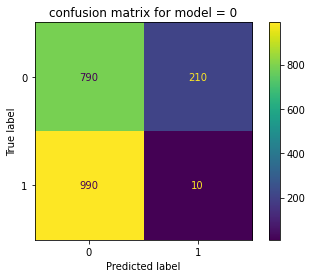

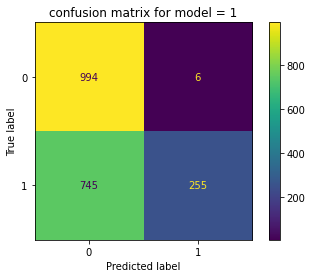

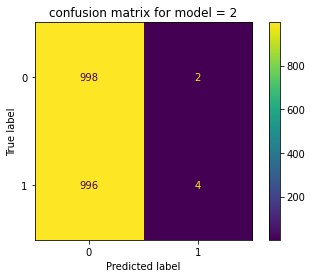

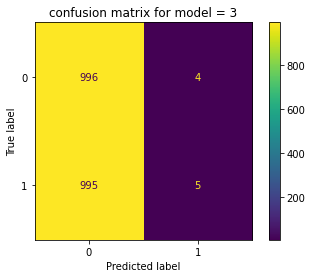

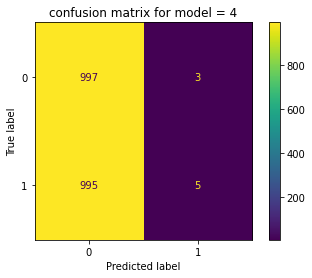

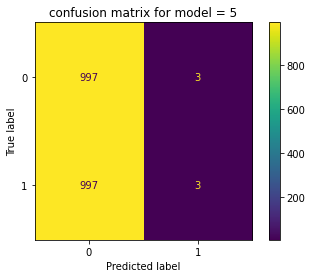

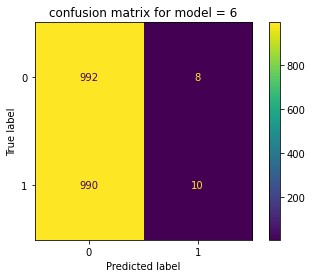

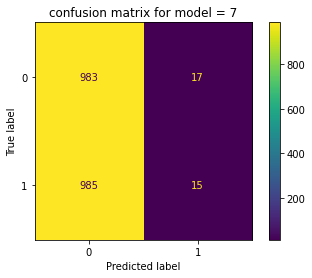

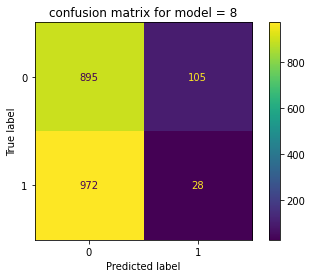

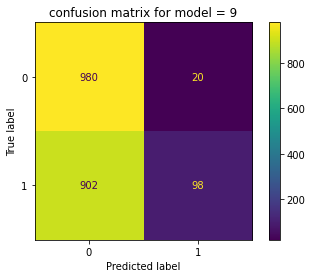

In [ ]:
ConfusionMatrixDisplay,
# def OVR (x_train , y_train , x_test , y_test):
acc_m = []
y_prob = []
for i in range(0,10):
  y_tra = (y2_train==i).astype(int)
  # y_tes = (y_test==i).astype(int)
  model = LogisticRegression() .fit(x2_train,y_tra)
  pred_log = model.predict(x2_test)
  prob_log = model.predict_proba(x2_test)
  acc_model = accuracy_score(y2_test, pred_log)
  acc_m.append(acc_model)
  y_prob.append(prob_log[:,1])
  y_prob_all = np.array(y_prob).T 
  y_pred_ovr = y_prob_all.argmax(1)
  cm1 = confusion_matrix(y2_test,pred_log ,labels=model.classes_)
  cm1_display = ConfusionMatrixDisplay(cm1).plot()
  plt.title(f'confusion matrix for model = {i}')
  print(f"Accuracy for model {i}  equal {acc_model}")
  # print(y_pred_ovr )


visualize and calculate the accuracy for each model

In [ ]:
acc_m

[0.08, 0.1249, 0.1002, 0.1001, 0.1002, 0.1, 0.1002, 0.0998, 0.0923, 0.1078]

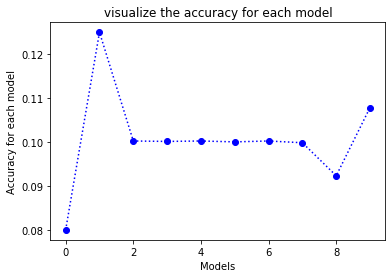

In [ ]:
x = list(range(0,10))
plt.plot(x , acc_m , 'o:b')

plt.xlabel("Models")
plt.ylabel("Accuracy for each model")
plt.title("visualize the accuracy for each model")

plt.show()

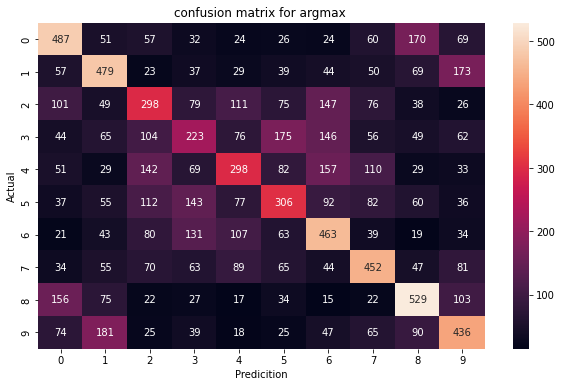

In [ ]:
acc_ovr = accuracy_score(y2_test, y_pred_ovr)
cm = confusion_matrix(y2_test, y_pred_ovr)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrix for argmax ")
plt.show()


Brief discussion

Implement baesline of logistic regression and achevie the accuracy 39.9%
After implementing OVR from scratch and building 10 models, calculate the probability for each one using (predict_proba) from sklearn.
The best model from 10 models was model 1 with an accuracy of 12% and the worst one model 0 with an accuracy of 8%.
Regarding this result, logistic regression model can easily detect model 1 (car) from others otherwise with model 0 (plane)

# Part 3. Support Vector Machine (SVM) Classification

In Part 3. you will use Scikit-learn to perform classification, again on the Cifar10 dataset. You can use the built in SVM library for classification. As with logistic regression, SVM is designed for binary classification. However, in this case Scikit-learn will handle the OvR models behind the scenes.

Your task is to compare different modes of the SVM and determine the best performer. 

Create an SVM baseline using the <code>LinearSVC()</code> function. Make sure to use the primal solution and use "ovr" for multiclass Calculate the accuracy score for comparison.

Next you will explore the effect of the cost parameter on the accuracy.
    <ul>
    <li>Run the classification with a range of C values For example: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]</li>
    <li>Plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

Add a regularization term.
    <ul>
    <li>Rerun the above experiment, but this time use L1 regularization.</li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

For the final experiment you will use the ```SVC()``` function to run the classifer with a kernel.
    <ul>
    <li>Use a radial basis function when training a new model</li>
    <li>Find the optimal combination of values for the cost and gamma parameters. Use the following values in your loop:<br/>
        <div style="margin-left:40px"><code>
        for cost in [0.01, 0.1, 1, 10, 100]:<br/>
        &emsp;for gamma in [0.01, 0.1, 1, 10, 100]:
        </code></div>
    </li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>


Choose the model with the highest accuracy and plot the confusion matrix. In your discussion explain the results of your experiments and the reason for increased performance from the baseline (if any). Comment on the effect of the cost-paramenter and the L1 penalty on accuracy as well as any overfitting you observed. Discuss the confusion matrix of the model accuracy and provide some reasons for high-values found off the main diagonal.

### Bonus Mark
Instead of using raw pixel values compute an alternate feature representation for your dataset and re-run train the model. Compare the accuracy of the model using the new feature representation with the model trained with pixel values.

Create an SVM baseline using the LinearSVC() function

In [ ]:
svm2= LinearSVC(dual=False, multi_class='ovr')
svm2.fit(x2_train,y2_train)

C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(dual=False)

In [ ]:
pred_svm = svm2.predict(x2_test)
acc_svm = accuracy_score(y2_test,pred_svm)
acc_svm

0.3212

In [ ]:
#confusion matrix

explore the effect of the cost parameter on the accuracy

In [ ]:
acc_c_1 = []
for c_value in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]:
  svm= LinearSVC(dual=False, multi_class='ovr' , C = c_value)
  svm.fit(x2_train,y2_train)
  pred_s = svm.predict(x2_test)
  acc_c_1.append(accuracy_score(y2_test,pred_s))

C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [ ]:
acc_c_1

[0.3329, 0.3245, 0.3215, 0.3222, 0.3212, 0.3202, 0.3202, 0.321]

Plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.

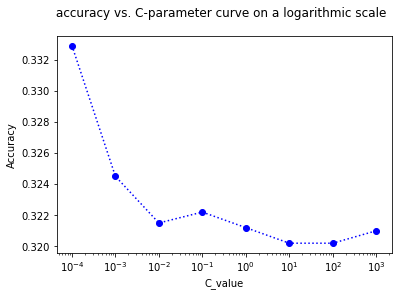

In [ ]:
c_value = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(c_value, acc_c_1,'o:b')
ax.set_xlabel('C_value')
ax.set_ylabel('Accuracy')
fig.suptitle(" accuracy vs. C-parameter curve on a logarithmic scale")
plt.show()

use L1 regularization

In [ ]:
acc_c_2 = []
for c_value in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]:
  svm= LinearSVC(penalty ='l1',dual=False, multi_class='ovr' , C = c_value)
  svm.fit(x2_train,y2_train)
  pred_s = svm.predict(x2_test)
  acc_c_2.append(accuracy_score(y2_test,pred_s))

C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mm\anaconda3\lib\site-packages\sklea

In [ ]:
acc_c_2

[0.1, 0.2786, 0.3797, 0.4025, 0.3719, 0.3661, 0.364, 0.364]

Plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.

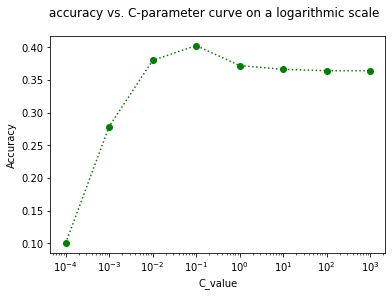

In [ ]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(c_value, acc_c_2,'o:g')
ax.set_xlabel('C_value')
ax.set_ylabel('Accuracy')
fig.suptitle(" accuracy vs. C-parameter curve on a logarithmic scale")
plt.show()

Use a radial basis function

In [ ]:
cost = [0.01, 0.1, 1, 10, 100]
gamma = [0.01, 0.1, 1, 10, 100]
acc_c_3 = []
acc_all = []
max_acc = []
for c in cost:
  for g in gamma:
    svm_svc = SVC(kernel='rbf',gamma =g , C= c) #Use a radial basis function
    svm_svc.fit(x2_train,y2_train)
    pred_s = svm_svc.predict(x2_test)
    acc_= accuracy_score(y2_test,pred_s)
    acc_c_3.append(acc_)
    print(f'when cost =%s, gamma =%s , the accuracy =%s'% (c , g , acc_) )
  acc_all.append(acc_c_3)
  max_acc.append(acc_all)

C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


when cost =0.01, gamma =0.01 , the accuracy =0.292


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


when cost =0.01, gamma =0.1 , the accuracy =0.1


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


when cost =0.01, gamma =1 , the accuracy =0.1


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


when cost =0.01, gamma =10 , the accuracy =0.1


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


when cost =0.01, gamma =100 , the accuracy =0.1


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


when cost =0.1, gamma =0.01 , the accuracy =0.4246


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


when cost =0.1, gamma =0.1 , the accuracy =0.1


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


when cost =0.1, gamma =1 , the accuracy =0.1


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


when cost =0.1, gamma =10 , the accuracy =0.1


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


when cost =0.1, gamma =100 , the accuracy =0.1


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


when cost =1, gamma =0.01 , the accuracy =0.5272


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


when cost =1, gamma =0.1 , the accuracy =0.1759


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


when cost =1, gamma =1 , the accuracy =0.1


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


when cost =1, gamma =10 , the accuracy =0.1


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


when cost =1, gamma =100 , the accuracy =0.1


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


when cost =10, gamma =0.01 , the accuracy =0.5372


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


when cost =10, gamma =0.1 , the accuracy =0.191


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


when cost =10, gamma =1 , the accuracy =0.1


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


when cost =10, gamma =10 , the accuracy =0.1


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


when cost =10, gamma =100 , the accuracy =0.1


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


when cost =100, gamma =0.01 , the accuracy =0.5354


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


when cost =100, gamma =0.1 , the accuracy =0.191


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


when cost =100, gamma =1 , the accuracy =0.1


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


when cost =100, gamma =10 , the accuracy =0.1


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


when cost =100, gamma =100 , the accuracy =0.1


In [ ]:
acc_all

[[0.292, 0.1, 0.1, 0.1, 0.1],
 [0.4246, 0.1, 0.1, 0.1, 0.1],
 [0.5272, 0.1759, 0.1, 0.1, 0.1],
 [0.5372, 0.191, 0.1, 0.1, 0.1],
 [0.5354, 0.191, 0.1, 0.1, 0.1]]

In [ ]:
max_acc = []
for i in range(len(acc_all)):
  max_acc.append(np.max(acc_all[i]))
max_acc

[0.292, 0.4246, 0.5272, 0.5372, 0.5354]

In [ ]:
acc_all[0]

[0.292, 0.1, 0.1, 0.1, 0.1]

 plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.

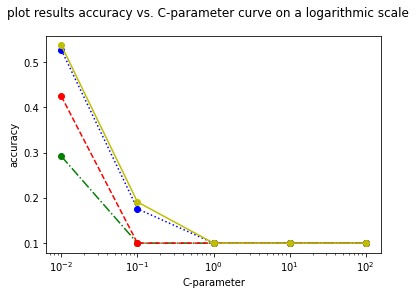

In [ ]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(cost, acc_all[0], 'o:g',linestyle="-.")
ax.plot(cost, acc_all[1], 'o:r' ,linestyle="--")
ax.plot(cost, acc_all[2], 'o:b' ,linestyle=":")
ax.plot(cost, acc_all[3], 'o:y' ,linestyle="-")
ax.set_xlabel('C-parameter')
ax.set_ylabel('accuracy') 
fig.suptitle("plot results accuracy vs. C-parameter curve on a logarithmic scale") 
plt.show()

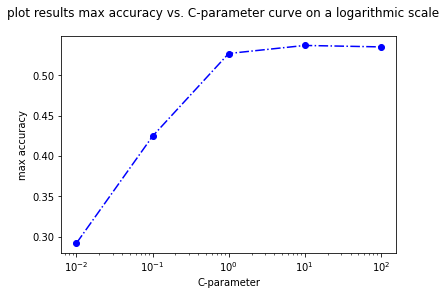

In [ ]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(cost, max_acc, 'o:b',linestyle="-.")
ax.set_xlabel('C-parameter')
ax.set_ylabel('max accuracy') 
fig.suptitle("plot results max accuracy vs. C-parameter curve on a logarithmic scale") 
plt.show()

Choose the model with the highest accuracy and plot the confusion matrix. (rbf , c = 10 , gamma = .01)

In [ ]:
svm_svc = SVC(kernel='rbf', C= 10 ,gamma =0.01 ) #Use a radial basis function
svm_svc.fit(x2_train,y2_train)
pred_s = svm_svc.predict(x2_test)
acc_= accuracy_score(y2_test,pred_s)
print(f'when cost =10 , gamma =0.01 , the accuracy =%s'% (acc_) )

C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


when cost =10 , gamma =0.01 , the accuracy =0.5372


In [ ]:
acc_

0.5372

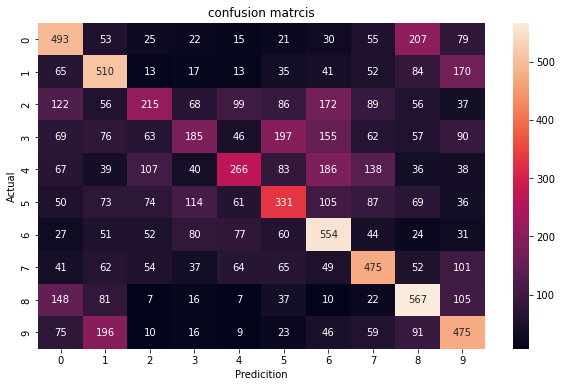

In [ ]:
cm = confusion_matrix(y2_test,pred_s)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrcis")
plt.show()

Brief discussion

First, apply the baseline for SVM, and calculate the accuracy that equals 32%

Second, explore the effect of the cost parameter on the accuracy the best one equal 33% when c_value = 0.0001

Third, L1 regularization is used to identify only essential features and get rid of others; for me, it is very challenging to use it.
use L1 regularization with different values of c, the best accuracy achieved 40% when c = .1, but there is no sign of overfitting.

Forth, 
 The "c" parameter in SVM controls classifying training points so the large C is the more classified point correct 
  The "gamma" parameter defines how far the influence of a single training example reaches.
Use a radial basis function with different values of c and gamma.
the best one of them when c = 10 and gamma = .01 with an accuracy of 53.7%

comparing all previous models accuracy of SVM the champion model SVM uses the radial basis function when c = 10 and gamma = .01 with an accuracy of 53.7%

plot the confusion matrix for the champion model 
and according to the higher the diagonal values
that means the better the predictions were be the model.



# Part 4. Write a Conclusion



##k-NN Classifier
Applying the k_nearest neighbors class, first, compare different distance models and calculate the accuracy, the best distance method was (Manhattan) then take multiple random values to get the best number of neighbors using the best distance method and it equals 15 with accuracy 24%

##Logistic Regression
Implement baesline of logistic regression and achevie the accuracy 39.9%
using ovr multiclasses and the best model from 10 models was model 1 with an accuracy of 12% and the worst one model 0 with an accuracy of 8%.

##Support Vector Machine (SVM) Classification
Apply the baseline for SVM, and calculate the accuracy that equals 32%

Explore the effect of the cost parameter on the accuracy the best one equal 33% when c_value = 0.0001

use L1 regularization with different values of c, the best accuracy achieved 40% when c = .1

Use a radial basis function with different values of c and gamma.
the best one of them when c = 10 and gamma = .01 with an accuracy of 53.7%

##champion model 
In svm , using a radial basis function when c = 10 and gamma = .01 with an accuracy of 53.7%

<!-- Write your conclusion here -->